# 03장. 회귀(Regression)
## 회귀란?
- 주어진 종속 변수와 독립 변수 사이의 관계를 학습해 데이터를 예측할 수 있게 함
- 둘 이상의 관계를 찾는 데 관심 있는 모든 곳에서 사용 가능
- ex. 주택 가격 추정
  - 방 개수, 바닥 면적, 지역, 편의 시설, 주차 공간 등이 영향
  - 회귀 분석을 통해 요인과 주택 가격 간의 수학적 관계를 찾을 수 있음
  - 집의 면적만이 주택 가격을 결정한다고 가정
    - 독립 변수: 다른 변수에 종속되지 않는 변수-주택 면적, 모델의 입력
    - 종속 변수: 하나 이상의 독립 변수에 종속된 변수-가격, 모델의 출력
    - -> 해당 주택의 면적만으로 모든 주택의 가격 예측
- 독립 변수의 수, 종속 변수의 수, 관계 유형에 따라 다양한 회귀 분석 존재
- 2가지 구성 요소
  1. 독립 변수와 종속 변수의 관계
  2. 종속 변수에 대한 서로 다른 독립 변수의 영향 강도

## 선형 회귀(Linear Regression)를 사용한 예측
- 입력 변수(X)와 출력 변수(Y) 사이에 선형의 관계가 있다고 가정
- 예측값 Y에 대한 선형 방정식: Y<sub>hat</sub> = W<sup>T</sup>X + b
  - n개의 입력 변수 X = {x1, x2, ..., xn}
  - 선형 계수 W = {w1, w2, ..., wn}
  - 편향(bias) b
    - 회귀 모델의 입력이 없는 경우에도 출력 제공
    - 데이터에 좀 더 잘 적합화하고자 데이터를 왼쪽이나 오른쪽으로 이동할 수 있는 옵션 제공
- 입력 표본 i의 관측값(Y)과 예측값(Y<sub>hat</sub>) 사이의 오차: e<sub>i</sub> = Y<sub>i</sub> - Y<sub>hati</sub>
- 목표: 관측치 Y와 예측값 Y<sub>hat</sub> 사이의 오차가 최소화되도록 W 계수와 b 계수에 대한 최적의 추정치 찾기

### 단순 선형 회귀
- 하나의 독립 변수와 하나의 종속 변수만 고려하는 경우
- ex. 주택 가격 예측
  - 독립 변수: 주택 면적(A), 종속 변수: 주택 가격(Y), 편향: b
  - 예측 가격 Y<sub>hat</sub>와 A 사이의 선형 관계: Y<sub>hat</sub> = A.W + b
  - 가격 Y와 예측 가격 Y<sub>hat</sub> 사이의 오차가 최소화되도록 W와 b 결정 -> **최소자승(least squares)법** 사용
    - 오차 제곱(S)의 합을 최소화: S(W,b) = Σ(i=1, N)(Y<sub>i</sub> - Y<sub>hat</sub>)<sup>2</sup> = Σ(i=1, N)(Y<sub>i</sub> - A<sub>i</sub>W - b)<sup>2</sup>
    - S가 최소화되도록 회귀 계수 W와 b 추정 by 함수의 미분 값은 최소 지점(minima)에서 0이 된다.
![image](https://user-images.githubusercontent.com/61455647/118430745-b7bde500-b70f-11eb-87ab-330a6efc0198.png)
      - 이때 2번째 식을 전개하면 다음 결과를 얻을 수 있다.
      ![image](https://user-images.githubusercontent.com/61455647/118430834-f0f65500-b70f-11eb-8ffa-b003e260539b.png)
      - 2번째 식에서 얻은 b 값을 기반으로 1번째 식을 전개하면 다음과 같은 W값을 얻을 수 있다.
      ![image](https://user-images.githubusercontent.com/61455647/118431181-b5a85600-b710-11eb-885f-92178c53f922.png)
  - 샘플 데이터를 이용해 다음과 같이 나타낼 수 있다.


/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passi

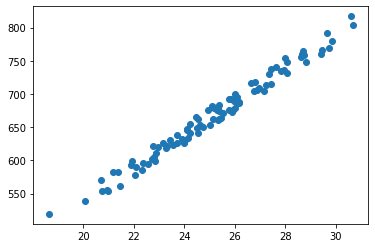

In [1]:
# 1. import modules
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 2. 선형 관계를 가진 랜덤 데이터 생성
# 사실적으로 하고자 랜덤 노이즈 요소 추가
# input: area, output: price가 양의 선형 종속 관계를 보임
np.random.seed(0)
area = 2.5 * np.random.randn(100) + 25
price = 25 * area + 5 + np.random.randint(20 ,50, size=len(area))

data = np.array([area, price])
data = pd.DataFrame(data = data.T, columns=['area', 'price'])
plt.scatter(data['area'], data['price'])
plt.show()

In [2]:
# 3. 앞서 정의한 식으로 두 회귀 계수 계산 - 결과는 선형 관계에 매우 가까움을 알 수 있다.
W = sum(price * (area - np.mean(area))) / sum((area - np.mean(area))**2)
b = np.mean(price) - W * np.mean(area)
print("The regression coefficients are ", W, b)

The regression coefficients are  24.815544052284988 43.4989785533412


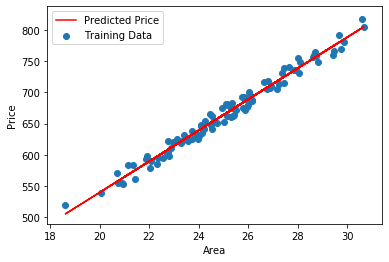

In [3]:
# 4. 구해진 가중치와 편향 값으로 새로운 가격 예측
y_pred = W * area + b

# 5. 실제 가격과 예측 가격 도식화 - 예측 가격이 면적에 대해 선형 관계
plt.plot(area, y_pred, color='red', label="Predicted Price")
plt.scatter(data['area'], data['price'], label="Training Data")
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend()

### 다중 선형 회귀
- 대부분 문제에서 종속 변수는 여러 독립 변수에 종속
- 많은 독립 입력 변수(X)와 종속 출력 변수(Y) 사이의 선형 관계를 찾아 예측된 Y값 충족: Y<sub>hat</sub> = W<sup>T</sup>X + b
  - n개의 입력 변수 X = {x1, x2, ..., xn}
  - 선형 계수 W = {w1, w2, ..., wn}
    - 최소 자승법으로 추정
    - 예측값(Y<sub>hat</sub>)과 관측값(Y) 사이의 제곱 차이의 합 최소화
  - 편향(bias) b
  - loss = Σ(Y<sub>i</sub> - Y<sub>hati</sub>)<sup>2</sup>
- 단순 선형 회귀에서는 방정식이 2개였지만 다중 선형 회귀는 n+1개의 방정식이 있다. -> 텐서플로 Estimator API 사용

### 다변량 선형 회귀
- 독립 변수가 둘 이상의 종속 변수에 영향
- Ŷ<sub>ij</sub> = w<sub>0j</sub> + Σ(k=1, p)w<sub>kj</sub>x<sub>ik</sub>
  - i ∈ [1, 2, ..., n]
  - j ∈ [1, 2, ..., m]
  - Ŷ<sub>ij</sub>: i번째 입력 표본의 j번째 예측 출력
  - w: 회귀 계수
  - x<sub>ik</sub>: i번째 입력의 k번째 특징
- 풀어야 하는 방정식 수: n * m
- 역행렬과 결정 계수(determinants)를 계산 -> 계산량 多
- -> 가장 쉬운 방법: 손실 함수로 최소 제곱 오차의 합계와 GD 사용, 텐서플로 API 중 여러 estimators 중 하나 사용

## 텐서플로 추정기
- TensorFlow는 estimator를 상위 레벨 API로 제공해 확장 가능하고 생산 지향적인 솔루션 제공
- estimator는 계산 그래프 생성, 변수 초기화, 모델 훈련, 체크 포인트 저장, 텐서보드 파일 로깅 같은 모든 막후 활동 처리
- TensorFlow가 제공하는 2가지 estimator
  1. 기성(canned) estimator
    - 미리 작성된 estimator
    - 단순한 입력 특징만 전달하면 바로 사용 가능
    - ex. 선형 분류기, 선형 회귀기, DNN 분류기
  2. 맞춤형 estimator(=사용자 정의 estimator): 사용자는 TensorFlow keras에 구축된 모델에서 자신에게 맞는 맞춤형 estimator 생성 가능

### 특징 열(feature column)
- 입력 데이터와 모델 간의 가교 역할
- 훈련을 위해 estimator가 사용하는 입력 매개변수는 feature column으로 전달
- 매개변수는 TensorFlow feature_column에서 정의, 모델에서 데이터 해석 방법 지정
- `tensorflow.feature_columns` 호출로 특징 열 생성
- 함수
  - Categorical Column 클래스 상속
    - `categorical_column_with_identity`
      - 각 범주는 원핫 인코딩 되어 고유한 ID를 가진다.
      - 숫자 값에만 사용
    - `categorical_column_with_vocabulary_file`
      - 범주형 입력은 문자열, 범주가 파일로 제공될 때 사용
      - 문자열은 숫자 값으로 변환 -> 원핫 인코딩
    - `categorical_column_with_vocabulary_list`
      - 범주형 입력은 문자열, 번주는 목록에서 명시적으로 정의된 경우
      - 문자열은 숫자 값으로 변환 -> 원핫 인코딩
    - `categorical_column_with_hash_bucket`: 범주 수가 매우 많아 원핫 인코딩이 불가능할 때 사용
    - `crossed_column`
      - 두 개의 열을 병합해 하나의 특징으로 사용
      - ex. 지정학적 위치에서 위도와 경도를 합쳐 하나의 특징으로 사용
  - Dense Column 클래스 상속
    - `numeric_column`: 특징이 수치일 때, 단일 숫자 or 행렬
    - `indicator_column`
      - 직접 사용 X, 범주 열과 함께 사용
      - 범주 수가 제한되고 원핫 인코딩으로 표시될 수 있는 경우
    - `embedding_column`
      - 직접 사용 X, 범주 열과 함께 사용
      - 범주 수가 매우 많고, 원핫 인코딩으로 표시할 수 없는 경우
  - Categorical Column & Dense Column 클래스 모두 상속
    - `bucketized_column`: 특정 수치 값 대신 그 값에 따라 데이터를 서로 다른 범주로 분류할 경우
  
### 입력 함수
- 훈련, 평가, 예측 데이터 사용할 수 있어야 한다.
- tf.Data.Dataset 객체 반환
- 객체는 특징과 레이블을 포함하는 튜플 반환

### 텐서플로 추정기 API를 사용한 MNIST
- 다중 회귀 문제에 대한 간단한 데이터셋을 사용해 간단한 TensorFlow estimator를 작성하자.
- 2가지 독립 변수(주택 면적과 주택 형식)에 대해 주택 가격을 예측하자.

In [4]:
# 1. modules import
# TensorFlow & feature_column module 필요 ∵ 데이터셋에 숫자 데이터와 범주 데이터 모두 포함 -> 2가지 유형의 데이터 처리하는 함수 필요
import tensorflow as tf
from tensorflow import feature_column as fc

numeric_column = fc.numeric_column
categorical_column_with_vocabulary_list = fc.categorical_column_with_vocabulary_list

# 2. 회귀기(regressor) 훈련시킬 때 사용할 특징 열 정의
# 데이터셋: 수치 값으로 된 면적, 방갈로/아파트 중 한 가지인 유형 특징
featcols = [
            tf.feature_column.numeric_column("area"),
            tf.feature_column.categorical_column_with_vocabulary_list("type", ["bungalow", "apartment"])
]

# 3. 훈련 과정에 입력을 제공하는 입력 함수 정의 - 특징과 레이블 포함된 튜플 반환
def train_input_fn():
  features = {"area": [1000, 2000, 4000, 1000, 2000, 4000],
              "type": ["bungalow", "bungalow", "house", "apartment", "apartment", "apartment"]}
  labels = [500, 1000, 1500, 700, 1300, 1900]
  return features, labels

# 4. LinearRegression을 이용해 훈련 데이터셋에 적합화
model = tf.estimator.LinearRegressor(featcols)
model.train(train_input_fn, steps=200)

# 5. 예측 결과 확인
def predict_input_fn():
  features = {"area": [1500, 1800], "type": ["house", "apt"]}
  return features

predictions = model.predict(predict_input_fn)

print(next(predictions))
print(next(predictions))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/47/jgr3sq9x3mq1z8dqtml817t80000gn/T/tmpf0c63bwu', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fa0e5f9acd0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automaticall

## 선형 회귀를 사용한 주택 가격 예측
- 보스턴 주택 가격 데이터셋([http://lib.stat.cmu.edu/datasets/boston](http://lib.stat.cmu.edu/datasets/boston))
  - 예시 506개
  - 속성 14개
    - CRIM: 지역별 1인당 범죄율
    - ZN: 25000평방미터당 주거 지역 비율
    - INDUS: 지역별 비상업 지역 비율
    - CHAS: 찰스강(Charles River) 더미 변수(찰스 강에 인접했으면 1, 아니면 0)
    - NOX: 산화질소 농도(부품 천만 개당)
    - RM: 주택당 평균 방의 개수
    - AGE: 1940년 이전에 건설된 자가 소유 비율
    - DIS: 보스턴의 5개 직업 센터까지의 가중 거리
    - RAD: 순환 고속도로까지의 거리
    - TAX: 10000달러당 재산세율
    - PTRATIO: 학생 대 교사 비율
    - B: 1000(Bk - 0.63)<sup>2</sup>, Bk는 인구 중 흑인 비율
    - LSTAT: 인구 중 하위 계층 비율
    - MEDV: 자가 가구의 중앙값(단위: 1000달러)

In [5]:
# 1. module import
import tensorflow as tf
import pandas as pd
import tensorflow.feature_column as fc
from tensorflow.keras.datasets import boston_housing

# 2. download dataset
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

# 3. 데이터 특징 정의, 처리와 시각화의 편의를 위해 pandas DataFrame으로 변환
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

x_train_df = pd.DataFrame(x_train, columns=features)
x_test_df = pd.DataFrame(x_test, columns=features)
y_train_df = pd.DataFrame(y_train, columns=['MEDV'])
y_test_df = pd.DataFrame(y_test, columns=['MEDV'])
x_train_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [6]:
# 4. 모든 특징 취하기
feature_columns = []
for feature_name in features:
  feature_columns.append(fc.numeric_column(feature_name, dtype=tf.float32))

# 5. 입력 함수 생성 - tf.Data.Dataset 객체를 feature과 레이블을 배치로 한 튜플로 반환
def estimator_input_fn(df_data, df_label, epochs=10, shuffle=True, batch_size=32):
  def input_function():
    ds = tf.data.Dataset.from_tensor_slices((dict(df_data), df_label))
    if shuffle:
      ds = ds.shuffle(100)
    ds = ds.batch(batch_size).repeat(epochs)
    return ds
  return input_function

train_input_fn = estimator_input_fn(x_train_df, y_train_df)
val_input_fn = estimator_input_fn(x_test_df, y_test_df, epochs=1, shuffle=False)

# 6. LinearRegression estimator의 인스턴스 생성
# train_input_fn으로 훈련 데이터 훈련, 훈련된 모델은 val_input_fn으로 평가해 검증 데이터셋의 결과 확인
linear_est = tf.estimator.LinearRegressor(feature_columns=feature_columns, model_dir='logs/func/')
linear_est.train(train_input_fn, steps=100)
result = linear_est.evaluate(val_input_fn)

# 7. 예측 수행
result = linear_est.predict(val_input_fn)
for pred, exp in zip(result, y_test[:32]):
  print("Predicted Value: ", pred['predictions'][0], "Expected: ", exp)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'logs/func/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fa0c9897bd0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was fina

In [7]:
%load_ext tensorboard.notebook
%tensorboard --logdir logs/func

Reusing TensorBoard on port 6006 (pid 3713), started 0:01:21 ago. (Use '!kill 3713' to kill it.)

## 분류 과제와 결정 경계
- 회귀(예측) vs. 분류

|분류|회귀|
|-|-|
|데이터 부류(class)/범주(category)로 그룹화|주어진 데이터에 대한 연속 수치 값 얻기|
|ex. 필기체 숫자 인식-모든 필기체 숫자는 [0-9] 사이에 있는 10개 숫자 중 하나에 속한다.|ex. 입력 변수에 따라 주택 가격 예측|
|모델은 한 부류와 다른 부류를 분리하는 결정 경계 찾기|모델은 입력-출력 관계에 맞는 함수 근사|
|회귀의 부분집합, 부류 예측|분류보다 더 일반적|
|부류를 분리하는 선(or 다차원 공간의 평면, 초평면)을 찾아야 함|주어진 입력 점을 적합화하는 선(or 평면, 초평면)을 찾아야 함|

![image](https://user-images.githubusercontent.com/61455647/118504863-dc917700-b766-11eb-9508-f2f679d6b931.png)

### 로지스틱 회귀(Logistic Regression)
- 사건(event)의 확률을 결정하는 데 사용
  - 사건: 범주 종속 변수
  - 사건 확률: 시그모이드(or Logit) 함수 사용 P(Y<sub>hat</sub> = 1|X = x) = 1 / (1 + e<sup>-(b+wTx)</sup>)
- 목표: 가중치 W = {w1, w2, ..., wn}와 편향 항 b 추정
- 계수는 최대 우도 추정기(Maximum Liklihood Estimator) 또는 SGD로 추정된다.
- p가 입력 데이터 포인트의 총 개수인 경우 손실은 교차 엔트로피(cross-entropy) 항으로 정의: loss =  Σ(i=1,p)Y<sub>i</sub>log(Y<sub>hati</sub>) + (1 - Y<sub>i</sub>)log(1 - Y<sub>hati</sub>)
- 분류 문제
  - ex. 의료 데이터에서 어떤 사람이 암에 걸렸는지 여부 분류
- 일-대-모두(One-versus-all): 둘 이상의 출력 변수에 사용되는 또 다른 일반적인 기술
- 다부류 로지스틱 회귀의 경우, 교차 엔트로피 손실 함수: loss =  Σ(i=1,p)Σ(j=1,k)Y<sub>ij</sub>log(Y<sub>hati</sub>)
  - K: 부류의 총 개수

### MNIST 데이터셋에 로지스틱 회귀 적용
- TensorFlow estimator에서 가용한 estimator classifier를 사용해 MNIST 데이터셋의 필기체 숫자 분류
  - estimator classifier
    - 특징과 레이블을 취함
    - 입력값을 원핫 인코딩된 벡터로 변환 -> 10비트로 출력을 나타냄
      - 각 비트는 0이나 1의 값을 가질 수 있고, 원핫은 레이블 Y와 각 이미지에 대해 10개 중 1비트만 1의 값을 갖고 나머지는 모두 0
- estimator는 10개 부류의 소프트맥스 확률인 로그 확률(logit)과 해당 레이블 출력

In [8]:
# 1. import modules
# 텐서플로와 tf.keras
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-alpha0


In [9]:
# 2. tf.keras 데이터셋에서 MNIST의 입력 데이터 취하기
# 훈련과 평가 데이터 로드
((train_data, train_labels), (eval_data, eval_labels)) = tf.keras.datasets.mnist.load_data()

# 3. 데이터 전처리
train_data = train_data / np.float32(255)
train_labels = train_labels.astype(np.int32)

eval_data = eval_data / np.float32(255)
eval_labels = eval_labels.astype(np.int32)

# 4. tf.feature_column 모듈로 28*28 크기의 수치 특징 정의
feature_columns = [tf.feature_column.numeric_column("x", shape=[28, 28])]

# 5. 로지스틱 회귀 추정기 생성-단순 LinearClassifier
classifier = tf.estimator.LinearClassifier(feature_columns=feature_columns, n_classes=10, model_dir="mnist_model/")

# 6. create input function from estimator
train_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(x={"x": train_data}, y=train_labels, batch_size=100, num_epochs=None, shuffle=True)

# 7, train classifier
classifier.train(input_fn=train_input_fn, steps=10)

# 8. create val_input_fn for validating data
val_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(x = {"x": eval_data}, y=eval_labels, num_epochs=1, shuffle=False)

# 9. evaluate trained Linear Classifier about validated data
eval_results = classifier.evaluate(input_fn=val_input_fn)
print(eval_results)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'mnist_model/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fa0e7620f10>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use t

In [10]:
%load_ext tensorboard.notebook
%tensorboard --logdir mnist_model/

The tensorboard.notebook extension is already loaded. To reload it, use:
  %reload_ext tensorboard.notebook


Reusing TensorBoard on port 6007 (pid 3725), started 0:00:48 ago. (Use '!kill 3725' to kill it.)

- tensorboard를 통해
    - LinearClassifier가 10단계를 학습한 후 정확도와 평균 손실의 변화를 시각화할 수 있다.
    - 신경망이 훈련 받는 동안 모델의 가중치와 편향이 어떻게 수정되는지 확인